# Project Title: "Twitter Sentix: Emotion Analysis on Social Media"

# Synopsis and Overview:

Twitter Sentiment Analysis is a data-driven project aimed at extracting insights and understanding public sentiment on Twitter. It involves collecting tweets related to specific topics, analyzing the text content, and determining whether the sentiment expressed is positive, negative, or neutral. This project can be applied to various domains, including brand monitoring, political analysis, product reviews, and more.

# Key Components:

# STEP1:Data Collection:
1.The Twitter data for this sentiment analysis project was collected from Kaggle, a popular platform for datasets and data science resources. 

2.Kaggle provided a pre-curated dataset containing tweets related to the chosen topic.

3.The dataset was used as the primary source of Twitter data for analysis.

# STEP2:Data Preprocessing:

1.Remove irrelevant information (e.g., retweets, links).

2.Tokenize and clean the text data.

3.Handle special characters, emojis, and mentions.

# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from string import punctuation
from collections import Counter
from nltk.stem import PorterStemmer

In [2]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
df=pd.read_csv('Twitter Sentiments.csv')

In [5]:
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [6]:
df.shape

(31962, 3)

In [7]:
df.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [9]:
df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [10]:
df.drop(columns='label',axis=1,inplace=True)

# Create a function to clean and preprocess text

In [11]:
def clean_text(text):
    # Tokenize
    tokens = nltk.word_tokenize(text)
    
    # Convert to lowercase
    tokens = [word.lower() for word in tokens]

    # Remove punctuation and special characters
    tokens = [word for word in tokens if word not in punctuation and not re.match(r'[^a-zA-Z0-9]', word)]

    # Remove emojis
    tokens = [re.sub('(?:[^\x00-\x7F])+', '', word) for word in tokens]

    # Remove square brackets and their contents
    tokens = [re.sub('\[.*?\]', '', word) for word in tokens]

    # Remove URLs
    tokens = [re.sub('https?://\S+|www\.\S+', '', word) for word in tokens]

    # Remove HTML tags
    tokens = [re.sub('<.*?>', '', word) for word in tokens]

    # Remove newlines
    tokens = [re.sub('\n', ' ', word) for word in tokens]

    # Remove words containing digits
    tokens = [re.sub(r'\w*\d\w*', '', word) for word in tokens]

    # Remove repeated words in a sentence
    word_counts = Counter(tokens)
    tokens = [word for word in tokens if word_counts[word] == 1]

    # Remove stop words
    all_stopwords = set(stopwords.words('english'))
    all_stopwords.discard('not')
    tokens = [word for word in tokens if word not in all_stopwords]

    # Stemming
    ps = PorterStemmer()
    tokens = [ps.stem(word) for word in tokens]

    # Join tokens
    cleaned_text = ' '.join(tokens)
    return cleaned_text

# Apply the cleaning function to the 'text_column'
df['cleaned_text'] = df['tweet'].apply(clean_text)

# Analysing the length of Words in each sentence from the cleaned text

In [12]:
df['length']=df['cleaned_text'].apply(len)

# STEP3:Sentiment Analysis:

Utilize Natural Language Processing (NLP) techniques to analyze sentiment.
Apply sentiment lexicons, machine learning models (e.g., Naive Bayes, LSTM), or pre-trained models (e.g., BERT).
Assign sentiment scores (positive, negative, neutral) to each tweet.

# AFINN lexicon 

to calculate sentiment scores for individual words and then aggregate those scores to determine the overall sentiment of a tweet.

In [13]:
from afinn import Afinn

In [14]:
afinn=Afinn()

In [15]:
# Calculate the sentiment scores for the cleaned text
df['sentiment_score']=df['cleaned_text'].apply(lambda x:afinn.score(x))

In [16]:
# Assign the sentiment labels based on sntiment score
df['sentiment']=df['sentiment_score'].apply(lambda x:'Positive'if x>0 else('Negative'if x<0 else 'Neutral'))

In [17]:
df

,id,tweet,cleaned_text,length,sentiment_score,sentiment
0,1,@user when a father is dysfunctional and is s...,user father dysfunct selfish drag kid dysfunct...,50,-4.0,Negative
1,2,@user @user thanks for #lyft credit i can't us...,thank lyft credit ca use caus offer wheelchair...,73,2.0,Positive
2,3,bihday your majesty,bihday majesti,14,0.0,Neutral
3,4,#model i love u take with u all the time in ...,model love take time ur,23,3.0,Positive
4,5,factsguide: society now #motivation,factsguid societi motiv,23,0.0,Neutral
...,...,...,...,...,...,...
31957,31958,ate @user isz that youuu?ðððððð...,ate user isz youuu,18,0.0,Neutral
31958,31959,to see nina turner on the airwaves trying to...,see nina turner airwav tri wrap mantl genuin h...,84,2.0,Positive
31959,31960,listening to sad songs on a monday morning otw...,listen song monday morn otw work,32,0.0,Neutral
31960,31961,"@user #sikh #temple vandalised in in #calgary,...",user sikh templ vandalis calgari wso condemn act,48,-2.0,Negative


In [18]:
df['label']=df['sentiment'].apply(lambda x:1 if x=='Positive' else(2 if x=='Neutral' else 0))

In [19]:
df

,id,tweet,cleaned_text,length,sentiment_score,sentiment,label
0,1,@user when a father is dysfunctional and is s...,user father dysfunct selfish drag kid dysfunct...,50,-4.0,Negative,0
1,2,@user @user thanks for #lyft credit i can't us...,thank lyft credit ca use caus offer wheelchair...,73,2.0,Positive,1
2,3,bihday your majesty,bihday majesti,14,0.0,Neutral,2
3,4,#model i love u take with u all the time in ...,model love take time ur,23,3.0,Positive,1
4,5,factsguide: society now #motivation,factsguid societi motiv,23,0.0,Neutral,2
...,...,...,...,...,...,...,...
31957,31958,ate @user isz that youuu?ðððððð...,ate user isz youuu,18,0.0,Neutral,2
31958,31959,to see nina turner on the airwaves trying to...,see nina turner airwav tri wrap mantl genuin h...,84,2.0,Positive,1
31959,31960,listening to sad songs on a monday morning otw...,listen song monday morn otw work,32,0.0,Neutral,2
31960,31961,"@user #sikh #temple vandalised in in #calgary,...",user sikh templ vandalis calgari wso condemn act,48,-2.0,Negative,0


# Part1:Applying the Machine learning Models

# 1.CountVectorizer:

What it does: CountVectorizer converts text documents into a matrix of token counts. Each row represents a document, and each column represents a unique word (token) in the corpus. It counts the frequency of each word in the document.

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
bow_transformer=CountVectorizer(analyzer='word').fit(df['cleaned_text'])

In [22]:
bow_transformer

CountVectorizer()

In [23]:
len(bow_transformer.vocabulary_)

30848

In [24]:
mess_bow=bow_transformer.transform(df['cleaned_text'])

In [25]:
mess_bow

<31962x30848 sparse matrix of type '<class 'numpy.int64'>'
	with 232074 stored elements in Compressed Sparse Row format>

In [26]:
print('sparse matrix shape:',mess_bow.shape)

sparse matrix shape: (31962, 30848)


In [27]:
mess_bow.nnz

232074

In [28]:
sparsity=(100*mess_bow.nnz/(mess_bow.shape[0]*mess_bow.shape[1]))

In [29]:
print('sparsity',sparsity)

sparsity 0.023537781574644787


# 2.TF-IDF Vectorizer (Term Frequency-Inverse Document Frequency):

What it does: TF-IDF Vectorizer calculates a weight for each word in a document that reflects its importance within that document relative to the entire corpus. It considers both term frequency (how often a word appears in a document) and inverse document frequency (how unique or rare a word is across all documents).

In [30]:
from sklearn.feature_extraction.text import TfidfTransformer

In [31]:
tfidftransformer=TfidfTransformer().fit(mess_bow)

In [32]:
message_tfidf=tfidftransformer.transform(mess_bow)

In [33]:
# print(tfidftransformer.transform(mess_bow))

# 3.Multinomial Naive Bayes:

What it does: Multinomial Naive Bayes is a probabilistic classification algorithm often used for text classification tasks. It assumes that the features (word frequencies in this case) are generated from a multinomial distribution.

In [34]:
from sklearn.naive_bayes import MultinomialNB

In [35]:
twitter_model=MultinomialNB().fit(message_tfidf,df['label'])

In [36]:
mess5='i am happy'
mess=bow_transformer.transform([mess5])

In [37]:
twitter_model.predict(mess)

array([1], dtype=int64)

# Splitting the Data for Training and Testing

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['label'], test_size=0.2, random_state=42)

# 4:Pipelines:

What they do: Pipelines are used to streamline and organize the workflow of data preprocessing and model building. They allow you to specify a series of data transformation steps, such as vectorization and model training, in a structured way.

In [40]:
from sklearn.pipeline import Pipeline

In [41]:
pipeline=Pipeline([('bow',CountVectorizer(analyzer='word')),
                   ('tfidf',TfidfTransformer()),
                   ('multinomial',MultinomialNB())])

In [42]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('multinomial', MultinomialNB())])

In [43]:
pipline_predict=pipeline.predict(X_test)

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test,pipline_predict))

              precision    recall  f1-score   support

           0       0.95      0.35      0.51      1002
           1       0.80      0.87      0.83      2489
           2       0.76      0.87      0.81      2902

    accuracy                           0.79      6393
   macro avg       0.84      0.70      0.72      6393
weighted avg       0.81      0.79      0.77      6393



# Part2: Applying the Deeplearning Model

For sentiment analysis using Recurrent Neural Networks (RNNs), the goal is to classify the sentiment or emotion expressed in a piece of text. Sentiment analysis typically involves classifying text into categories like positive, negative, or neutral sentiment. 

# Subpart1:Importing libraries

In [46]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout,Embedding
from keras.utils import to_categorical

# Subpart2:Extract the cleaned text and sentiment labels

In [47]:
cleaned_text=df['cleaned_text']
label=df['label']

# Subpart3:Tokenize and preprocess the text data

In [48]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)


In [49]:
# Get the actual vocabulary size
vocab_size = len(tokenizer.word_index) + 1  # Add 1 for the padding token (if used)
print("Actual Vocabulary Size:", vocab_size)

Actual Vocabulary Size: 26827


In [50]:
# Define the actual vocabulary size based on your dataset
vocab_size = 26827  # Adjust as needed

# Tokenize and pad sequences with the correct vocabulary size
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train)

In [51]:
X_train_sequences=tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [52]:
max_sequence_length = 100
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

In [53]:
X_train_padded

array([[    0,     0,     0, ...,   719,    46,    46],
       [    0,     0,     0, ...,  1665,  4293,  2495],
       [    0,     0,     0, ...,  9782,   446,   285],
       ...,
       [    0,     0,     0, ...,    86,    41,  1508],
       [    0,     0,     0, ...,   638, 26826,   398],
       [    0,     0,     0, ...,  2937,    42,  1658]])

In [54]:
X_test_padded

array([[   0,    0,    0, ...,    5, 3976, 3976],
       [   0,    0,    0, ...,  446, 4730,  529],
       [   0,    0,    0, ...,  486, 2197,   72],
       ...,
       [   0,    0,    0, ..., 3953, 7322,  129],
       [   0,    0,    0, ...,  473,   19,    5],
       [   0,    0,    0, ...,    8,  651, 4621]])

# Subpart4:Convert the label data into categorical (one-hot) format

In [55]:
# Convert labels to one-hot encoding for multi-class classification
y_train_encoded = to_categorical(y_train, num_classes=3)
y_test_encoded = to_categorical(y_test, num_classes=3)

In [56]:
y_train_encoded

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [57]:
y_test_encoded

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

# Subpart5:Build the RNN MODEL

1.LSTM (Long Short-Term Memory):

Purpose: LSTMs are a type of recurrent neural network (RNN) architecture designed to address the vanishing gradient problem, which is a limitation of traditional RNNs. LSTMs are particularly well-suited for handling sequences of data, such as time series, text, and speech.

2.Embedding Layer:

Purpose: The embedding layer is used to convert discrete categorical data, such as words in natural language, into continuous vector representations. It is a crucial step in natural language processing tasks, where words or tokens in a text corpus need to be transformed into numerical values that can be processed by neural networks.    

In [58]:
model = Sequential()
#Adding the input layer
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_sequence_length))
#Adding the lstm layer
model.add(LSTM(128))
#Adding the output layer
model.add(Dense(3, activation='softmax'))  # Three output classes

# Subpart6:Compiling and Training the Model

In [59]:
#Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [60]:
# Train the model
model.fit(X_train_padded, y_train_encoded, epochs=5, batch_size=64, validation_data=(X_test_padded, y_test_encoded))


Epoch 1/5
400/400 [==============================] - 249s 576ms/step - loss: 0.4173 - accuracy: 0.8377 - val_loss: 0.1716 - val_accuracy: 0.9478
Epoch 2/5
400/400 [==============================] - 222s 555ms/step - loss: 0.0708 - accuracy: 0.9763 - val_loss: 0.1372 - val_accuracy: 0.9590
Epoch 3/5
400/400 [==============================] - 218s 545ms/step - loss: 0.0298 - accuracy: 0.9895 - val_loss: 0.1519 - val_accuracy: 0.9582
Epoch 4/5
400/400 [==============================] - 217s 543ms/step - loss: 0.0183 - accuracy: 0.9941 - val_loss: 0.1699 - val_accuracy: 0.9548
Epoch 5/5
400/400 [==============================] - 237s 593ms/step - loss: 0.0138 - accuracy: 0.9953 - val_loss: 0.1646 - val_accuracy: 0.9587


# Subpart7:Evaluate the model Performance

In [61]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test_encoded)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

200/200 [==============================] - 29s 144ms/step - loss: 0.1646 - accuracy: 0.9587
Test Loss: 0.1645832657814026
Test Accuracy: 0.9587048292160034


# STEP4:Data Visualization:

Create visualizations (e.g., bar charts, word clouds, time series) to represent sentiment trends.
Provide insights into how sentiment changes over time or across different sources.

In [62]:
import matplotlib.pyplot as plt


In [63]:
# 1. Box Plots for Sentiment Scores:

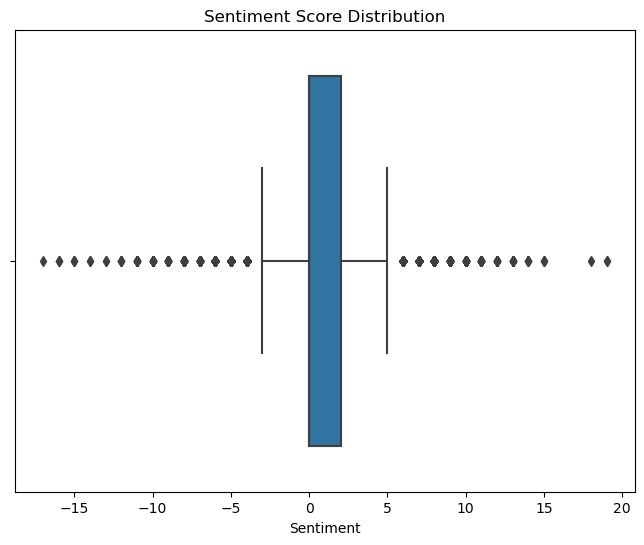

In [64]:
# Create a box plot
plt.figure(figsize=(8, 6))
# Sample data (replace with your data)
sentiment_data = df['sentiment_score']
sns.boxplot(x=sentiment_data)
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment")
plt.show()

In [65]:
# 2.Pie Charts for Sentiment Proportions:

Text(0.5, 1.0, 'Sentiment Distribution')

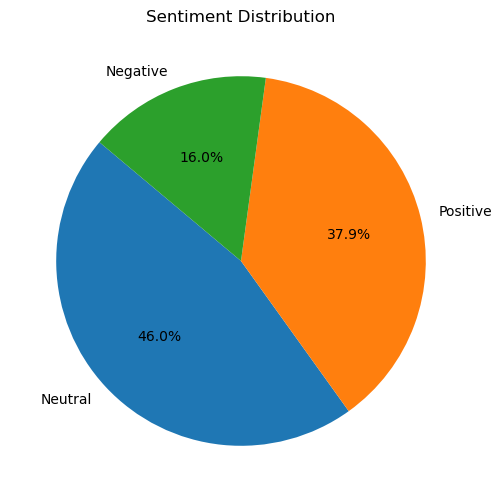

In [66]:
#  Sample data (replace with your data)
sentiment_counts = df['sentiment'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Sentiment Distribution")

In [67]:
# 3.Correlation Matrix:

Text(0.5, 1.0, 'Correlation Matrix')

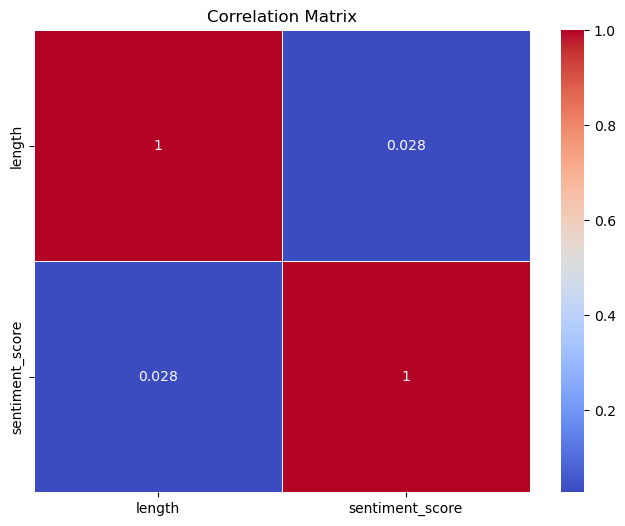

In [68]:
# Sample data (replace with your data)
correlation_data = df[['length', 'sentiment_score']]

# Calculate the correlation matrix
corr_matrix = correlation_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')

In [69]:
# 4.Violin Plots:

Text(0.5, 1.0, 'Distribution of Sentiment Scores')

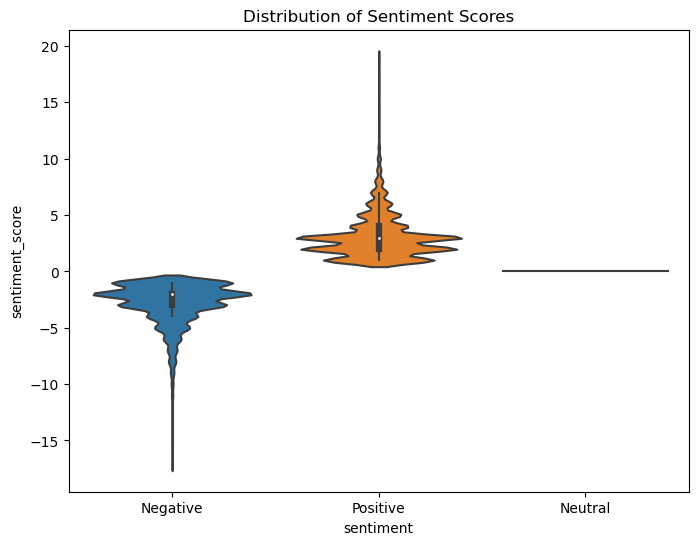

In [70]:
# Sample data (replace with your data)
sentiment_scores = df['sentiment_score']

# Create a violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='sentiment', y='sentiment_score', data=df)
plt.title('Distribution of Sentiment Scores')

# STEP5:Sentiment Classification:
Support Vector Machines (SVM): 
    
SVM is popular choice for sentiment analysis due to its effectiveness in text classification tasks.  


Support Vector Machines (SVM) are widely used in sentiment analysis for several reasons:

1.Effective Classification: SVMs are known for their effectiveness in binary and multiclass classification tasks. In sentiment analysis, where you typically have three categories (positive, negative, neutral), SVM can handle these categories well.

2.Handling High-Dimensional Data: Text data in sentiment analysis is often high-dimensional due to the large vocabulary. SVMs work effectively in high-dimensional spaces and can handle the resulting sparsity in text data.

3.Non-Linearity: SVMs can handle non-linear decision boundaries through the use of kernel functions. This allows SVMs to capture complex relationships between text features and sentiment.

Step 1: Import Required Libraries

In [71]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

Step 2: Create Tfidfvectorizer to convert text data to numerical features 

In [72]:
tfidfvectorizer=TfidfVectorizer(max_features=1000,stop_words=stopwords.words('english'))
x_train_tfidf=tfidfvectorizer.fit_transform(X_train)
x_test_tfidf=tfidfvectorizer.transform(X_test)

In [73]:
x_train_tfidf,x_test_tfidf

(<25569x1000 sparse matrix of type '<class 'numpy.float64'>'
 	with 117606 stored elements in Compressed Sparse Row format>,
 <6393x1000 sparse matrix of type '<class 'numpy.float64'>'
 	with 29577 stored elements in Compressed Sparse Row format>)

In [74]:
#Train the SVM classifier
svm_classifier=SVC(kernel='linear',C=1)
svm_classifier.fit(x_train_tfidf,y_train)

SVC(C=1, kernel='linear')

In [75]:
# Make predictions
svm_predict=svm_classifier.predict(x_test_tfidf)

In [76]:
# Evaluate the model
accuracy = accuracy_score(y_test, svm_predict)
classification_rep = classification_report(y_test, svm_predict)

In [77]:
print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_rep)


Accuracy: 0.9141248240262787
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.72      0.80      1002
           1       0.95      0.94      0.94      2489
           2       0.89      0.96      0.92      2902

    accuracy                           0.91      6393
   macro avg       0.91      0.87      0.89      6393
weighted avg       0.91      0.91      0.91      6393



# STEP6:User Engagement Analysis:

1.Analyze user engagement metrics (e.g., length of tweet) in relation to sentiment.

2.Determine which sentiments tend to generate more user interaction.

Step 1: Group by Sentiment Category

Group the data by sentiment category and calculate the mean engagement metrics for each category:

In [78]:
engagement_metrics=['length']

In [79]:
sentiment_groups = df.groupby('sentiment')[engagement_metrics].mean().reset_index()

In [80]:
sentiment_groups

,sentiment,length
0,Negative,53.331643
1,Neutral,40.618167
2,Positive,48.888522


Text(0, 0.5, 'length')

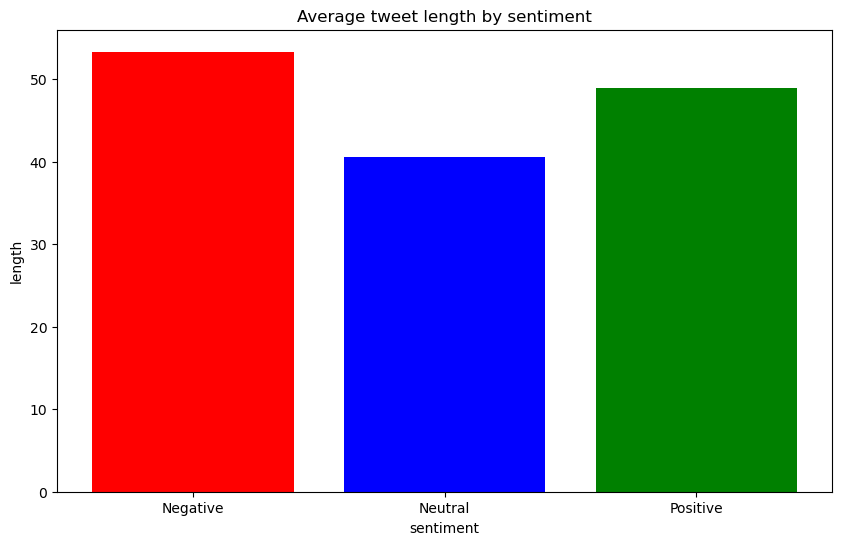

In [81]:
#Plot the result
plt.figure(figsize=(10,6))
plt.bar(sentiment_groups['sentiment'],sentiment_groups['length'],color=['r','b','g'])
plt.title('Average tweet length by sentiment')
plt.xlabel('sentiment')
plt.ylabel('length')

# STEP7:Sentiment Prediction:

Build a sentiment prediction model that can classify new, unseen tweets.

Evaluate the model's accuracy and performance.

In [82]:
# 1. Sentiment Prediction with a Pipeline-based Model
print(classification_report(y_test,pipline_predict))

              precision    recall  f1-score   support

           0       0.95      0.35      0.51      1002
           1       0.80      0.87      0.83      2489
           2       0.76      0.87      0.81      2902

    accuracy                           0.79      6393
   macro avg       0.84      0.70      0.72      6393
weighted avg       0.81      0.79      0.77      6393



In [83]:
# 2. Sentiment Prediction with an SVM-based Model
print(classification_report(y_test, svm_predict))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1002
           1       0.95      0.94      0.94      2489
           2       0.89      0.96      0.92      2902

    accuracy                           0.91      6393
   macro avg       0.91      0.87      0.89      6393
weighted avg       0.91      0.91      0.91      6393



In [84]:
# 3. Sentiment Prediction with an RNN-based Model

In [85]:
loss, accuracy = model.evaluate(X_test_padded, y_test_encoded)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

200/200 [==============================] - 21s 102ms/step - loss: 0.1646 - accuracy: 0.9587
Test Loss: 0.1645832657814026
Test Accuracy: 0.9587048292160034


# STEP8:Reporting and Insights:

Generate reports or dashboards summarizing sentiment analysis results.

Provide actionable insights based on sentiment trends and user engagement.

Text(0, 0.5, 'counts')

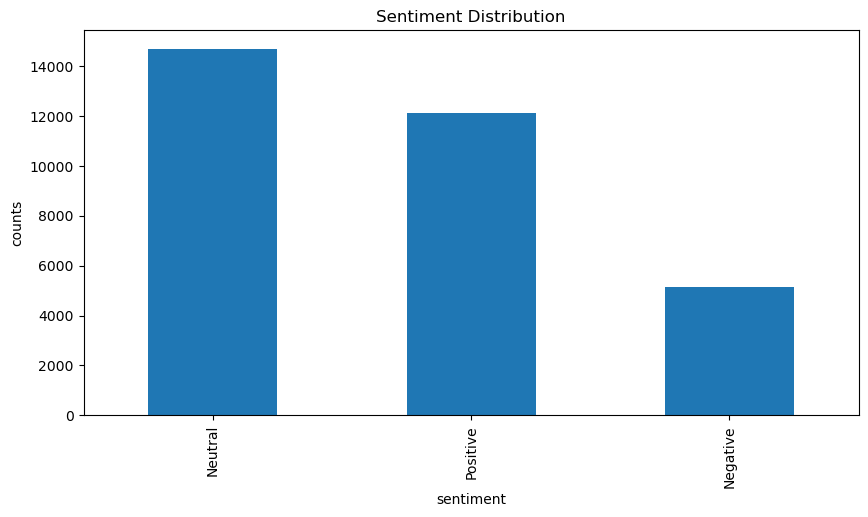

In [86]:
#1.Sentiment distribution Analysis
plt.figure(figsize=(10,5))
sentiment_counts=df['sentiment'].value_counts()
sentiment_counts.plot(kind='bar',title='Sentiment Distribution')
plt.xlabel('sentiment')
plt.ylabel('counts')

Text(0, 0.5, 'sentiment_score')

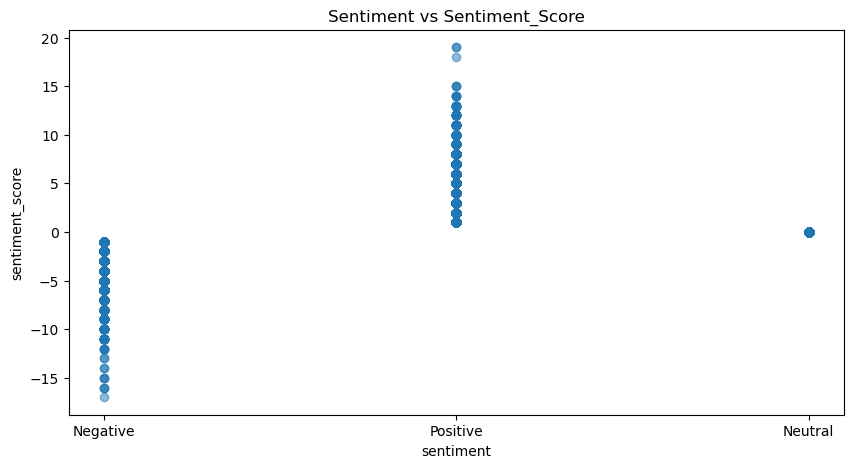

In [87]:
#2.Sentiment vs Sentiment_Score
plt.figure(figsize=(10,5))
plt.scatter(df['sentiment'],df['sentiment_score'],alpha=0.5)
plt.title('Sentiment vs Sentiment_Score')
plt.xlabel('sentiment')
plt.ylabel('sentiment_score')

In [88]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [89]:
from wordcloud import WordCloud

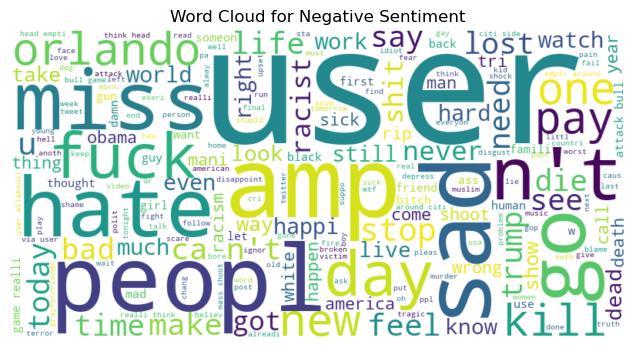

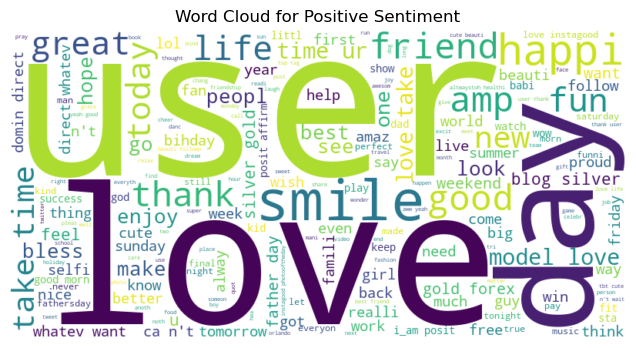

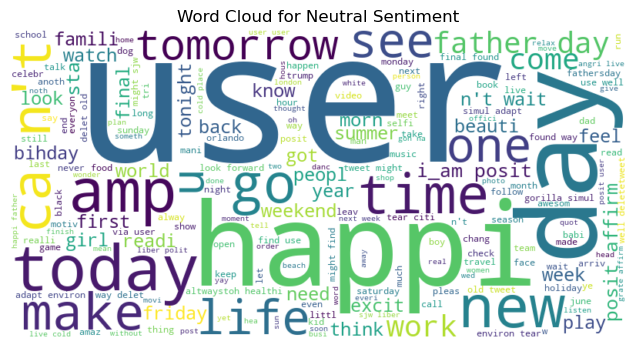

In [90]:
#3. Word Clouds for each Sentiment
for sentiment in df['sentiment'].unique():
    text = ' '.join(df[df['sentiment'] == sentiment]['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.axis('off')

# Conclusion:
    
Twitter Sentiment Analysis is a versatile project that empowers individuals and organizations to gain a deeper understanding of public sentiment, allowing them to respond effectively to changing sentiments and engage with their audience more meaningfully. This project showcases the power of data-driven insights in today's digital landscape.